In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df = pd.read_csv('nba_2013.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013


In [3]:
df.shape

(481, 31)

In [4]:
#df.isnull().sum()

In [5]:
pd.set_option('display.max_columns', None)
df[(df["x3p."].isnull()) | (df["ft."].isnull())].head(2)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013


In [6]:
pd.set_option('display.max_columns', None)
df[(df["x3p."].isnull()) & (df["ft."].isnull())].head(2)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
90,Josh Childress,SF,30,NOP,4,0,24,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN,0,3,3,2,1,0,1,1,0,2013-2014,2013
134,Shane Edwards,SF,26,CLE,2,0,12,1,3,0.333,0,0,NaN,1,3,0.333333,0.333,0,0,NaN,1,1,2,0,0,0,1,1,2,2013-2014,2013


In [7]:
pd.set_option('display.max_columns', None)
df[df["efg."].isnull()]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
90,Josh Childress,SF,30,NOP,4,0,24,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN,0,3,3,2,1,0,1,1,0,2013-2014,2013
397,Chris Smith,PG,26,NYK,2,0,2,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,2013-2014,2013


In [8]:
# value change for series
## https://www.codegrepper.com/code-examples/python/pandas+update+column+values+based+on+condition
df['fg.'] = np.where(df["fg"] == 0, 0, df['fg']/df['fga'])
df['x3p.'] = np.where(df["x3p"] == 0, 0, df['x3p']/df['x3pa'])
df['x2p.'] = np.where(df["x2p"] == 0, 0, df['x2p']/df['x2pa'])
df['ft.'] = np.where(df["ft"] == 0, 0, df['ft']/df['fta'])
## x2p. and efg. is almost nearerr value
df['efg.'] = np.where(df["efg."].isnull() == True, df["x2p."], df["efg."])

In [9]:
pd.set_option('display.max_columns', None)
df[df["efg."].isnull()]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end


In [10]:
df.iloc[[90, 397]]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
90,Josh Childress,SF,30,NOP,4,0,24,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0,3,3,2,1,0,1,1,0,2013-2014,2013
397,Chris Smith,PG,26,NYK,2,0,2,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,2013-2014,2013


In [11]:
df.head(1)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468085,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660377,72,144,216,28,23,26,30,122,171,2013-2014,2013


### observation 
90 and 397 row has max missing value rows we can delete it

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           481 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          481 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          481 non-null    float64
 16  efg.          481 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,481.0,26.509356,4.198265,19.0,23.000000,26.000000,29.000000,39.0
g,481.0,53.253638,25.322711,1.0,32.000000,61.000000,76.000000,83.0
gs,481.0,25.571726,29.658465,0.0,0.000000,10.000000,54.000000,82.0
mp,481.0,1237.386694,897.258840,1.0,388.000000,1141.000000,2016.000000,3122.0
fg,481.0,192.881497,171.832793,0.0,47.000000,146.000000,307.000000,849.0
fga,481.0,424.463617,368.850833,0.0,110.000000,332.000000,672.000000,1688.0
fg.,481.0,0.434605,0.102405,0.0,0.400000,0.437421,0.479299,1.0
x3p,481.0,39.613306,50.855639,0.0,0.000000,16.000000,68.000000,261.0
x3pa,481.0,110.130977,132.751732,0.0,3.000000,48.000000,193.000000,615.0
x3p.,481.0,0.245397,0.176482,0.0,0.000000,0.314607,0.366460,1.0


<AxesSubplot:>

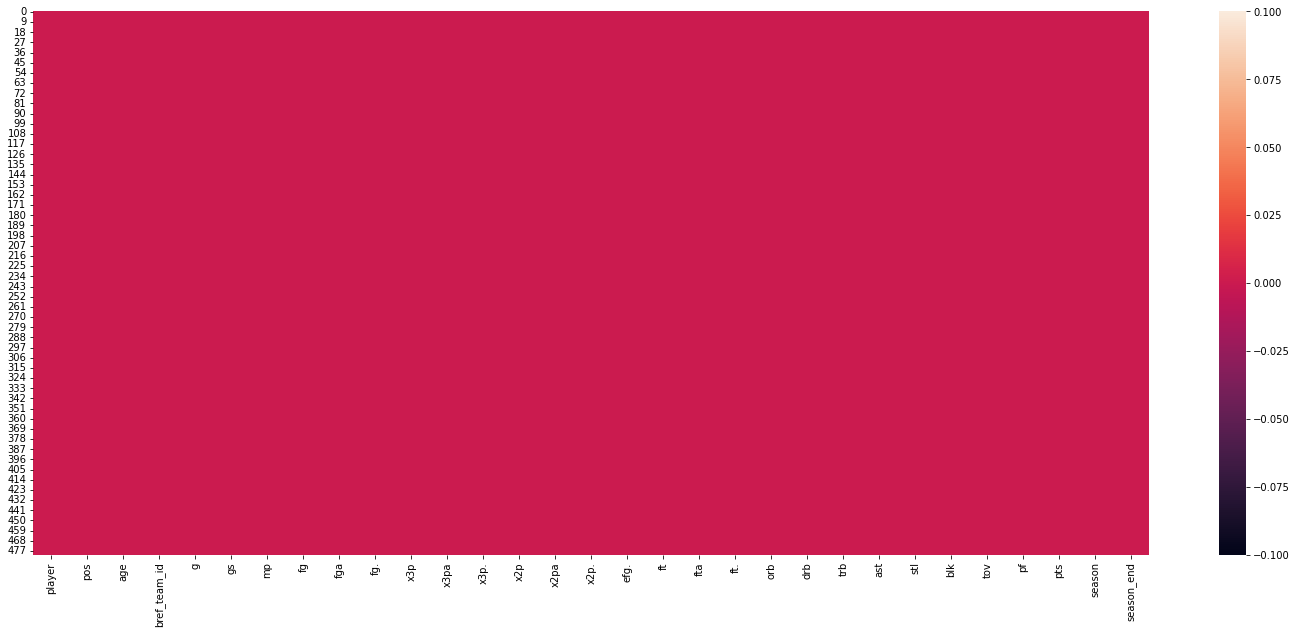

In [14]:
fig,ax = plt.subplots(figsize=(25,10))
sns.heatmap(df.isnull())

<AxesSubplot:>

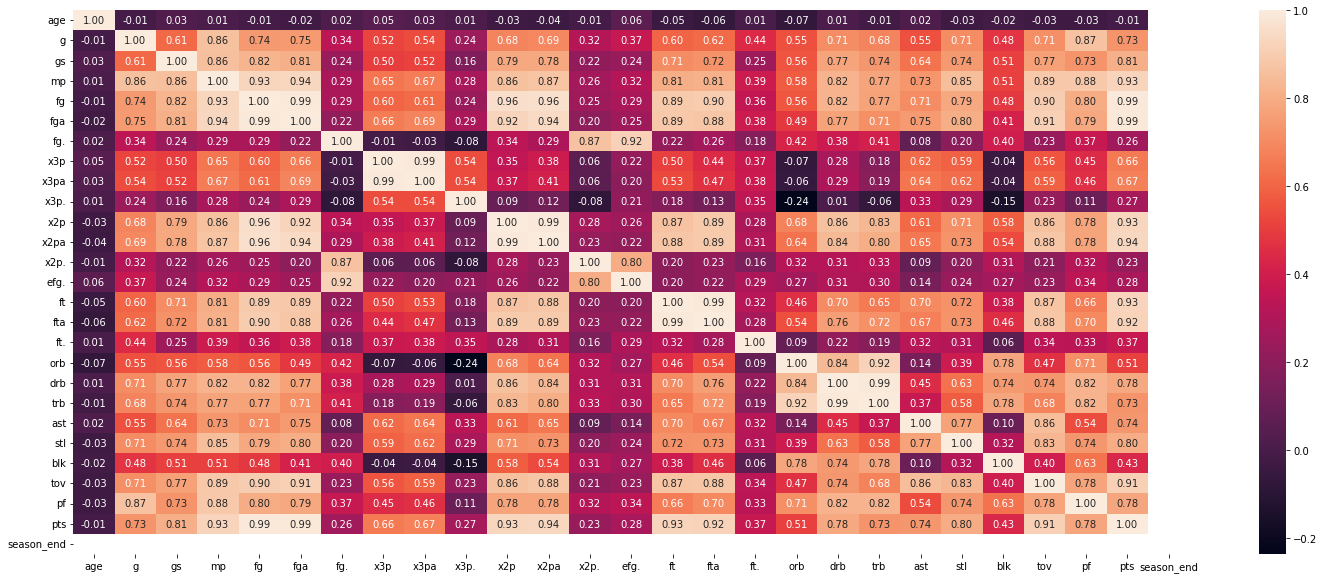

In [15]:
fig,ax = plt.subplots(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

<AxesSubplot:xlabel='x3p.', ylabel='Count'>

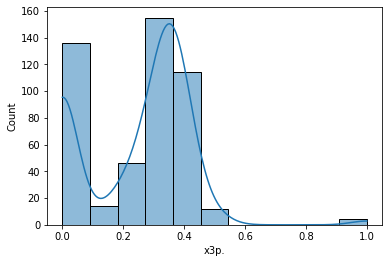

In [16]:
sns.histplot(data=df,x='x3p.', kde=True)

<AxesSubplot:xlabel='x3p.'>

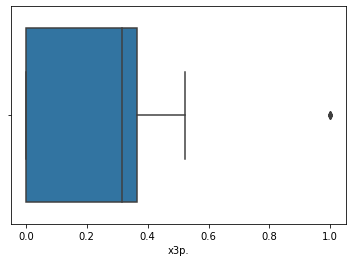

In [17]:
sns.boxplot(data=df,x='x3p.')

In [18]:
df = df[(df['x3p.']>0) & (df['x3p.']<0.8)]
df.shape

(344, 31)

<AxesSubplot:xlabel='x3p.', ylabel='Count'>

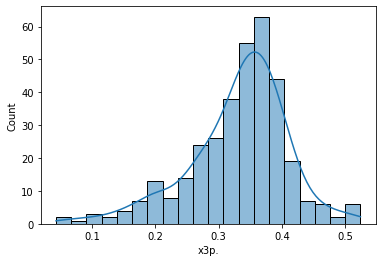

In [19]:
sns.histplot(data=df,x='x3p.', kde=True)

<AxesSubplot:xlabel='ft.', ylabel='Count'>

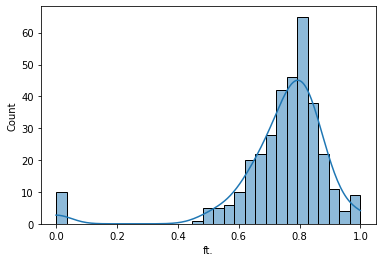

In [20]:
sns.histplot(data=df,x='ft.', kde=True)

<AxesSubplot:xlabel='ft.'>

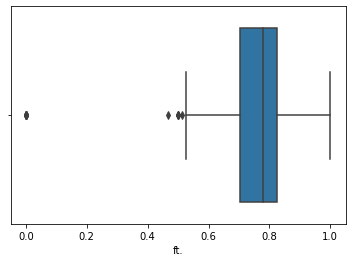

In [21]:
sns.boxplot(data=df,x='ft.')

In [22]:
df = df[df['ft.']>0.6]

<AxesSubplot:xlabel='ft.'>

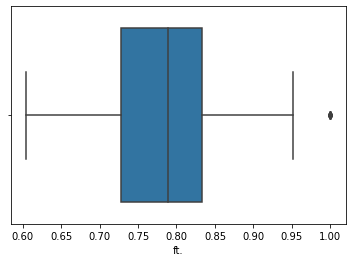

In [23]:
sns.boxplot(data=df,x='ft.')

In [24]:
df.corr()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
age,1.000000,0.034581,0.037097,0.049287,0.024240,0.007847,0.125552,0.102785,0.071764,0.201436,-0.008336,-0.022878,-0.008845,0.269859,-0.030819,-0.046297,0.145578,-0.039254,0.035062,0.016106,0.036911,-0.006033,-0.006752,-0.013936,0.014568,0.021531,NaN
g,0.034581,1.000000,0.570621,0.847856,0.700575,0.718372,0.399182,0.571301,0.598703,0.171146,0.623841,0.634587,0.340923,0.312377,0.546812,0.558772,-0.071254,0.508659,0.669759,0.651760,0.523288,0.669131,0.406530,0.657397,0.840192,0.692711,NaN
gs,0.037097,0.570621,1.000000,0.852753,0.801154,0.801468,0.372516,0.560064,0.582566,0.133670,0.747014,0.747019,0.295046,0.267667,0.675705,0.682293,0.057335,0.529364,0.739809,0.711042,0.636614,0.736537,0.473735,0.730194,0.694608,0.793628,NaN
mp,0.049287,0.847856,0.852753,1.000000,0.916361,0.929841,0.438976,0.691187,0.721514,0.197469,0.836204,0.845813,0.345251,0.330338,0.781261,0.788700,0.065427,0.574291,0.813597,0.779809,0.721165,0.826656,0.466637,0.857344,0.874738,0.915228,NaN
fg,0.024240,0.700575,0.801154,0.916361,1.000000,0.989709,0.491939,0.623909,0.646934,0.148146,0.959513,0.955588,0.358002,0.317285,0.884202,0.888198,0.113625,0.580846,0.831241,0.795107,0.691261,0.744192,0.466849,0.879312,0.768933,0.991829,NaN
fga,0.007847,0.718372,0.801468,0.929841,0.989709,1.000000,0.408694,0.667599,0.698544,0.158230,0.931578,0.945011,0.294962,0.261818,0.880266,0.880914,0.128222,0.541731,0.804003,0.763562,0.719514,0.758378,0.422022,0.890724,0.779994,0.988299,NaN
fg.,0.125552,0.399182,0.372516,0.438976,0.491939,0.408694,1.000000,0.142867,0.117379,0.209397,0.531151,0.463053,0.712311,0.785054,0.373970,0.393539,-0.038987,0.505755,0.510746,0.529247,0.207560,0.334631,0.450416,0.362040,0.434143,0.455850,NaN
x3p,0.102785,0.571301,0.560064,0.691187,0.623909,0.667599,0.142867,1.000000,0.989421,0.511176,0.378528,0.391825,0.165483,0.408850,0.497789,0.465267,0.261013,0.079047,0.408060,0.333970,0.543889,0.553617,0.055311,0.561981,0.547035,0.673138,NaN
x3pa,0.071764,0.598703,0.582566,0.721514,0.646934,0.698544,0.117379,0.989421,1.000000,0.450873,0.409612,0.426113,0.172731,0.358017,0.532289,0.503182,0.236298,0.105319,0.430297,0.358175,0.575531,0.592847,0.062684,0.602042,0.576268,0.696521,NaN
x3p.,0.201436,0.171146,0.133670,0.197469,0.148146,0.158230,0.209397,0.511176,0.450873,1.000000,-0.008776,-0.006019,-0.063085,0.589435,0.053393,0.023494,0.286202,-0.173388,0.012604,-0.037761,0.167948,0.143668,-0.065827,0.105063,0.114415,0.174769,NaN


In [25]:
numeric_clm = df.loc[:, df.dtypes != 'object']
numeric_clm = numeric_clm.drop('season_end',axis=1)

In [26]:
object_clm = df.loc[:, df.dtypes == 'object']
object_clm = object_clm.drop('season',axis=1)

In [27]:
object_clm.head()

,player,pos,bref_team_id
0,Quincy Acy,SF,TOT
3,Arron Afflalo,SG,ORL
6,LaMarcus Aldridge,PF,POR
7,Lavoy Allen,PF,TOT
8,Ray Allen,SG,MIA


In [62]:
from sklearn.preprocessing import LabelEncoder
# multiple column label encoding at a
# label_en = object_clm[["pos","bref_team_id"]].apply(LabelEncoder().fit_transform)
# label_en['player'] = object_clm['player']

### off label encode and on stander scaler to match other data with minmax scaler
label_en = pd.get_dummies(object_clm)

In [64]:
## https://github.com/Lokeshrathi/Exploring-NBA-2013-stats/blob/master/NBA_2013.ipynb
## https://github.com/siddharthalal/knn/blob/master/knn-predict-nba-player-points.ipynb

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(numeric_clm), columns=numeric_clm.columns,index=label_en.index)

In [66]:
cleaned_df = pd.concat([label_en, scaled], axis=1)

In [67]:
from sklearn.model_selection import train_test_split
X = cleaned_df.drop('pts',axis=1)
y = cleaned_df['pts']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# check for increasing neighbour values to see which has the highest regression score

for k in range(10):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    print ("Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for k_value:", k_value)

Regression score is: 0.5463 for k_value: 1
Regression score is: 0.7889 for k_value: 2
Regression score is: 0.8619 for k_value: 3
Regression score is: 0.8716 for k_value: 4
Regression score is: 0.8727 for k_value: 5
Regression score is: 0.8697 for k_value: 6
Regression score is: 0.8737 for k_value: 7
Regression score is: 0.8654 for k_value: 8
Regression score is: 0.8580 for k_value: 9
Regression score is: 0.8591 for k_value: 10


In [73]:
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)

In [77]:
## output playpoint
Test_With_Predicted = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred.tolist()})
Test_With_Predicted.head()

,Actual Points,Predicted Points
0,0.423867,0.451154
1,0.309182,0.318481
2,0.177451,0.195993
3,0.370012,0.232191
4,0.110810,0.154923
